<a href="https://colab.research.google.com/github/panghanwu/build_neural_network_python/blob/main/loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean-Square Error (MSE)
Regression problems  
$E \equiv \dfrac{1}{2} \displaystyle\sum_{k=1}^{n} (y_{k}-t_{k})^2 $  
  
# Cross Entropy
Classification, probability problems  
$E \equiv -\displaystyle\sum_{k=1}^{n} t_{k} \times ln(y_{k}) $  


Mean-Square Error: 16.294823344318793
Cross Entropy: 35.99176326802635


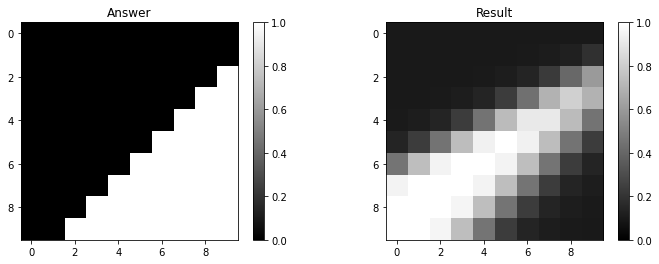

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# input data
x_0 = np.arange(-1.0, 1.0, 0.2)
x_1 = np.arange(-1.0, 1.0, 0.2)
z = np.zeros(100)

# correct answer
t = np.ones(100)

for i in range(10):
  for j in range(10):
    if x_0[i]+x_1[j] < 0:
      t[i*10+j] = 0

# parameter
w_im = np.array([[12.0,6.0], 
          [6.0,6.0]])  # weight: input to middle
w_mo = np.array([[1.0],
          [-1.0]])  # weight: middle to output

b_im = np.array([3.0,-3.0])  # bias: input to middle
b_mo = np.array([0.1])  # bias: middle to output


# define function
def middle_layer(x, w, b):
  u = np.dot(x, w) + b
  return 1/(1+np.exp(-u))

def output_layer(x, w, b):
  u = np.dot(x, w) + b
  return u
# MSE
def mean_square_sum(z, t):
  return 1.0/2.0 * np.sum(np.square(z-t))
# Cross Entropy
def cross_entropy(z, t):
  return - np.sum(t*np.log(z+1e-7))  # add 1e-7 to avoid z=0 error


# implement neural network
for i in range(10):
  for j in range(10):
    # generate input data
    inp = np.array([x_0[i], x_1[j]])
    # middle layer
    mid = middle_layer(inp, w_im, b_im)
    # output layer
    out = output_layer(mid, w_mo, b_mo)
    # outcome
    z[i*10+j] = out[0]  # turn array to value

# loss
print('Mean-Square Error:', mean_square_sum(z, t))
print('Cross Entropy:', cross_entropy(z, t))

# plot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Answer')
plt.imshow(t.reshape(10,10), 'gray', vmin=0.0, vmax=1.0)
plt.colorbar()
plt.subplot(1,2,2)
plt.title('Result')
plt.imshow(z.reshape(10,10), 'gray', vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

### Slope of cross entropy is steeper than MSE in [0,1], so cross entropy is a better choice for probability problems.

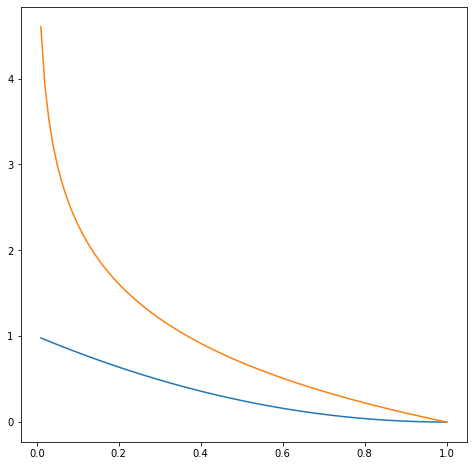

In [2]:
z = np.arange(0.01,1.01,0.01)

plt.figure(figsize=(8,8))
plt.plot(z, (z-1)**2)
plt.plot(z, -np.log(z+1e-7))